In [39]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch

model = load_model('models/6partGHZ.pt', 'cpu', 60, 1, 3)
DIM = [2] * 6
kets = hf.makeState('000000+111111')
state = fc.State(kets, normalize=True)

In [25]:
input_graph, ket_amplitudes, output_fidelity = generatorGraphFidelity(DIM, state, short_output=False)

In [44]:
#baseline graph
for edge in input_graph.edges:
    input_graph[edge] = 0
    if edge in [(0, 1, 0, 0), (2, 3, 0, 0), (4, 5, 0, 0), (1, 2, 1, 1), (3, 4, 1, 1), (0, 5, 1, 1)]:
        input_graph[edge] = 1
input_graph.getState()
input_graph.state.normalize()
#predict fidelity of baseline (which ideally should be 1)
input = torch.tensor(input_graph.weights, dtype=torch.float).to('cpu')
model(input)

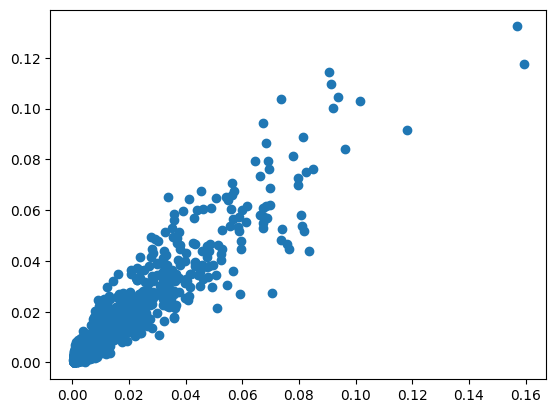

In [2]:
#scatterplot ground-truth vs. prediction
x = []
y = []
for i in range(1000):
    input_graph, ket_amplitudes, output_fidelity = generatorGraphFidelity(DIM, state, short_output=False)
    input = torch.tensor(input_graph.weights, dtype=torch.float).to('cpu')
    x.append(float(model(input)))
    y.append(output_fidelity)
plt.scatter(x, y)

Text(0, 0.5, 'Dreamed Fidelity')

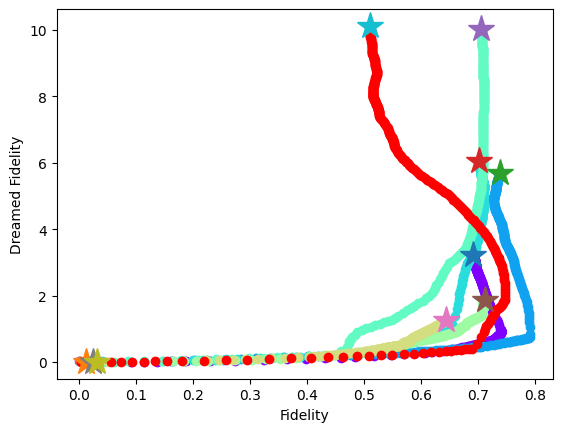

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

directory = 'dreamfiles'
ii=0
colors = cm.rainbow(np.linspace(0, 1,10))
for filename in os.listdir(directory):
    df = pd.read_csv(f'{directory}/{filename}',sep=";",names=['fidelity','activation','graph'])
    c = colors[ii]
    plt.scatter(list(df.iloc[:,0]),list(df.iloc[:,1]),color=c)
    plt.plot([df.iloc[-1,0]],[df.iloc[-1,1]],marker='*', markersize=20)
    ii+=1
plt.xlabel('Fidelity')
plt.ylabel('Dreamed Fidelity')